In [2]:
import os
import imghdr
from collections import Counter

C:\Users\patel\AppData\Local\Temp\ipykernel_49552\2870217852.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [25]:
dataset_path = 'C:/Users/patel/OneDrive/Desktop/IVC_Project/thumbnails'

In [26]:
# Function to identify image formats
def get_image_formats(dataset_path):
    formats = []
    for img_name in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, img_name)
        if os.path.isfile(img_path):  # Ensure it's a file
            img_format = imghdr.what(img_path)
            if img_format:
                formats.append(img_format.upper())
    return Counter(formats)

In [27]:
# Extract labels
def get_labels(dataset_path):
    labels = []
    for img_name in os.listdir(dataset_path):
        if os.path.isfile(os.path.join(dataset_path, img_name)):
            label = img_name.split("_")[0]  # Modify this based on your naming convention
            labels.append(label)
    return Counter(labels)


In [28]:
# Dataset Description
def find_image_files(dataset_path):
    image_files = []
    valid_formats = {"ppm.bz2", "png", "jpg", "tfif", "bmp", "gif"}  # Common image formats

    for file in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file)
        if os.path.isfile(file_path):
            img_format = imghdr.what(file_path)  # Detect image format
            if img_format in valid_formats:
                image_files.append(file)

    return image_files

In [29]:
image_formats = get_image_formats(dataset_path)
labels = get_labels(dataset_path)
description_file = find_image_files(dataset_path)

# Print results
print(f"Image Formats Found: {dict(image_formats)}")
print(f"Class Distribution: {dict(labels)}")
if description_file:
    print(f"Dataset description file found: {description_file}")
    with open(description_file, "r", encoding="utf-8") as f:
        print("\n--- Dataset Description ---\n")
        print(f.read()[:500])  # Print first 500 characters
else:
    print("No dataset description file found.")

Image Formats Found: {'JPEG': 6797}
Class Distribution: {'00700ba010': 1, '00700bb010': 1, '00700bc010': 1, '00700bd010': 1, '00700be010': 1, '00700bf010': 1, '00700bg010': 1, '00700bh010': 1, '00700bi010': 1, '00700bj010': 1, '00700bk010': 1, '00700fa010': 1, '00700fb010': 1, '00700hl010': 1, '00700hr010': 1, '00700pl010': 1, '00700pr010': 1, '00700ql010': 1, '00700qr010': 1, '00700ra010': 1, '00700rb010': 1, '00700rc010': 1, '00701fa010': 1, '00701fb010': 1, '00701hl010': 1, '00701hr010': 1, '00701pl010': 1, '00701pr010': 1, '00701ql010': 1, '00701qr010': 1, '00701rc010': 1, '00701rd010': 1, '00701re010': 1, '00702fa010': 1, '00702fb010': 1, '00702hl010': 1, '00702hr010': 1, '00702pl010': 1, '00702pr010': 1, '00702ql010': 1, '00702qr010': 1, '00702ra010': 1, '00702rb010': 1, '00702rc010': 1, '00703fa010': 2, '00703fb010': 2, '00703hl010': 2, '00703hr010': 2, '00703pl010': 2, '00703pr010': 2, '00703ql010': 2, '00703qr010': 2, '00703rc010': 2, '00703rd010': 2, '00703re010': 2, '00704fa

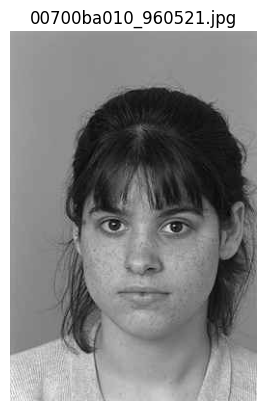

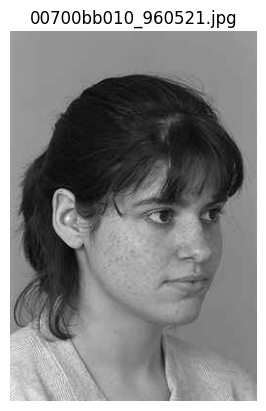

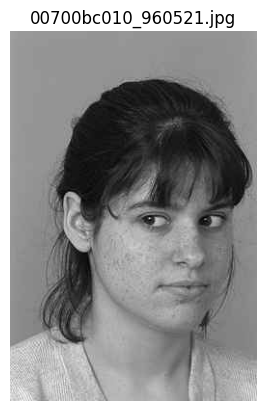

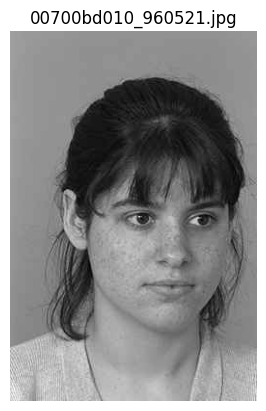

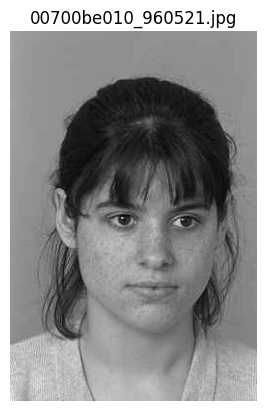

In [30]:
import matplotlib.pyplot as plt
import cv2
import os

# Load and display a few images
img_dir = 'C:/Users/patel/OneDrive/Desktop/IVC_Project/thumbnails'
sample_images = os.listdir(img_dir)[:5]

for img_name in sample_images:
    img_path = os.path.join(img_dir, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Could not load image: {img_name}")
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")
    plt.show()



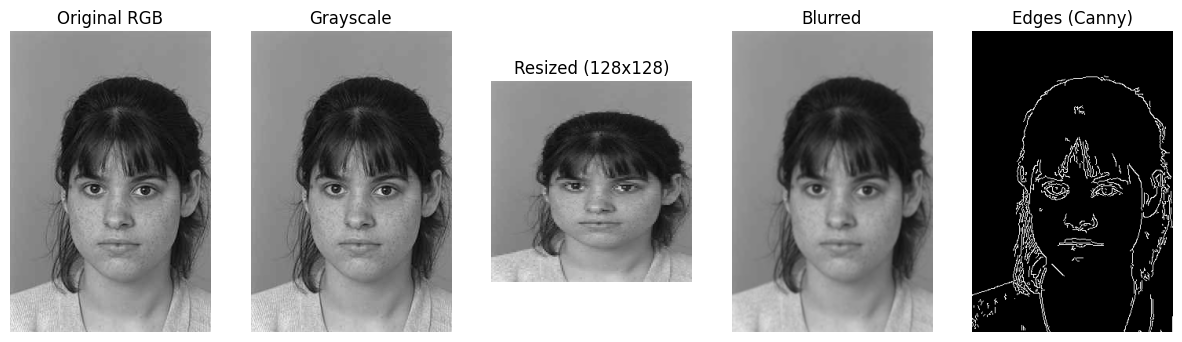

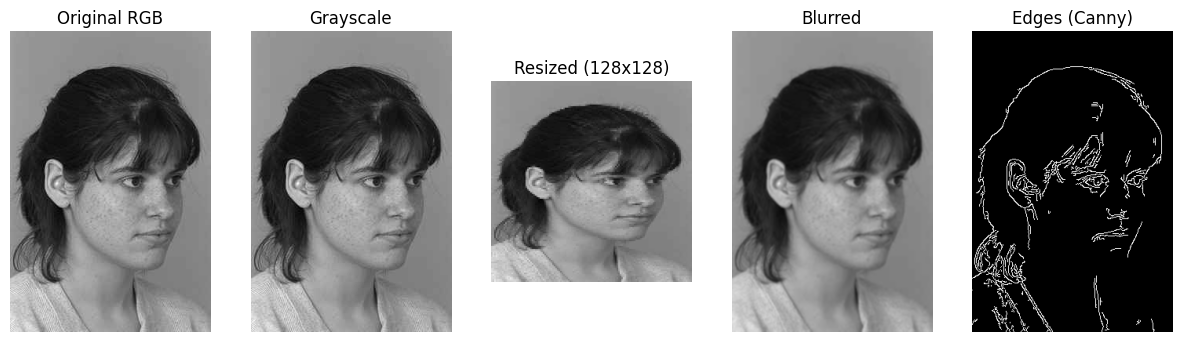

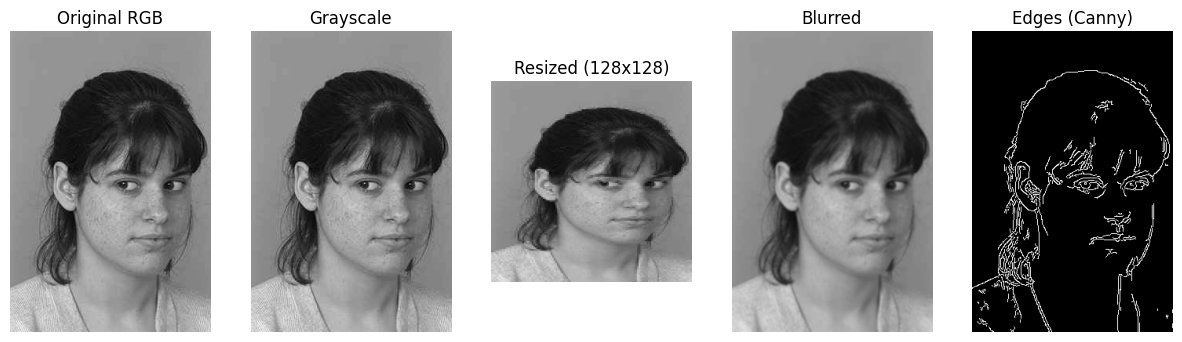

In [37]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the dataset path
img_dir = 'C:/Users/patel/OneDrive/Desktop/IVC_Project/thumbnails'
sample_images = os.listdir(img_dir)[:3]  # Pick first 3 images for testing

# Function to apply manipulations
def process_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not load image: {img_path}")
        return None
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_resized = cv2.resize(img_rgb, (128,128))  # Resize to 256x256
    img_blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)  # Apply Gaussian Blur
    img_edges = cv2.Canny(img_gray, 100, 200)  # Edge detection

    return img_rgb, img_gray, img_resized, img_blur, img_edges

# Display transformations for each sample image
for img_name in sample_images:
    img_path = os.path.join(img_dir, img_name)
    results = process_image(img_path)
    
    if results:
        img_rgb, img_gray, img_resized, img_blur, img_edges = results
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        axes[0].imshow(img_rgb)
        axes[0].set_title("Original RGB")
        
        axes[1].imshow(img_gray, cmap='gray')
        axes[1].set_title("Grayscale")
        
        axes[2].imshow(img_resized)
        axes[2].set_title("Resized (128x128)")
        
        axes[3].imshow(img_blur)
        axes[3].set_title("Blurred")
        
        axes[4].imshow(img_edges, cmap='gray')
        axes[4].set_title("Edges (Canny)")
        
        for ax in axes:
            ax.axis("off")
        plt.show()



#### Detecting facial colour with Grayscale Images
1) https://arxiv.org/html/2309.05180v2 


2) https://thesai.org/Downloads/Volume15No2/Paper_23-Ethnicity_Classification_Based_on_Facial_Images.pdf

#### Facial recognition with canny edge detectors
1) https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5474348

##### Unblurring

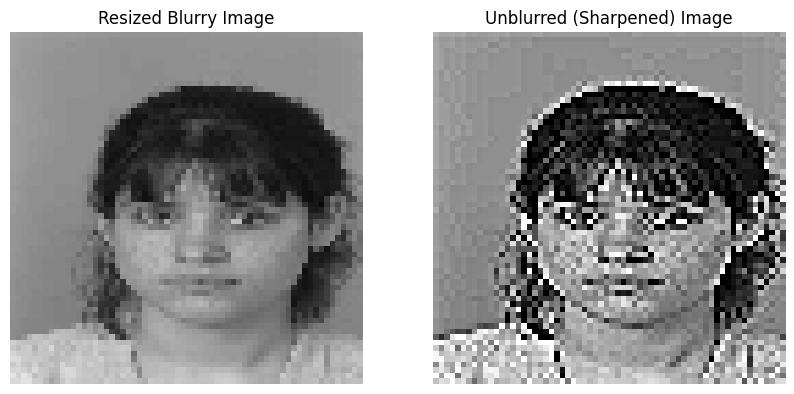

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize an image
img_path = "C:/Users/patel/OneDrive/Desktop/IVC_Project/thumbnails/00700ba010_960521.jpg"
img = cv2.imread(img_path)

if img is None:
    print("Error: Could not load image.")
else:
    img_resized = cv2.resize(img, (64,64))  # Resize to 256x256
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Define a sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])

    # Apply the sharpening filter
    img_sharpened = cv2.filter2D(img_resized, -1, sharpening_kernel)

    # Display original vs. sharpened images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_resized)
    axes[0].set_title("Resized Blurry Image")
    axes[0].axis("off")

    axes[1].imshow(img_sharpened)
    axes[1].set_title("Unblurred (Sharpened) Image")
    axes[1].axis("off")

    plt.show()


c:\Users\patel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\patel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\patel\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\patel\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\patel\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

IndexError: index 3 is out of bounds for axis 0 with size 3

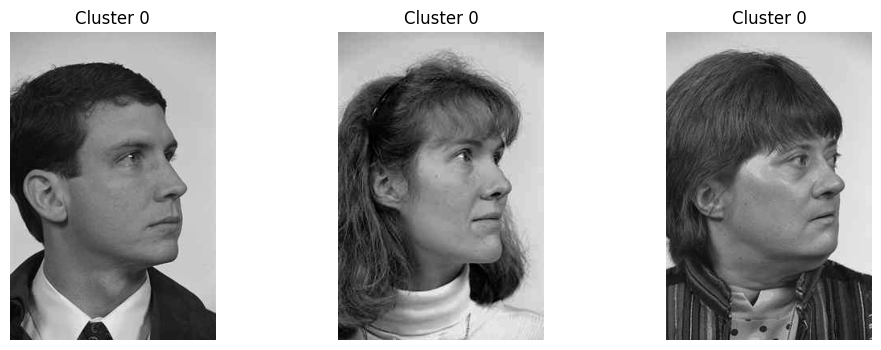

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.feature import local_binary_pattern

# Define paths
dataset_path = "C:/Users/patel/OneDrive/Desktop/IVC_Project/thumbnails"
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Function to extract LBP features
def extract_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    return hist / np.sum(hist)  # Normalize histogram

# Load images & extract features
feature_vectors = []
image_names = []
for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        continue
    
    faces = face_cascade.detectMultiScale(img, 1.1, 4)
    for (x, y, w, h) in faces:  # Extract face region
        face = img[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (128, 128))  # Normalize size
        features = extract_lbp_features(face_resized)
        feature_vectors.append(features)
        image_names.append(img_name)

# Convert to numpy array
feature_vectors = np.array(feature_vectors)

# Apply K-Means clustering (Assuming 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(feature_vectors)

# Display sample images per cluster
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for cluster_id in range(3):
    indices = np.where(clusters == cluster_id)[0][:50]  # Show 3 samples per cluster
    for i, idx in enumerate(indices):
        img_path = os.path.join(dataset_path, image_names[idx])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Cluster {cluster_id}")
        axes[i].axis("off")
plt.show()
